In [32]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import re
from nltk import SnowballStemmer          # para stemmizar
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer # para tokenizar
from nltk.corpus import stopwords         # para sacar las StopWords
from nltk.stem import WordNetLemmatizer   # para lemmatizar 
from nltk.tokenize import RegexpTokenizer # para tokenizar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')
warnings.warn('ignore')
import kerastuner as kt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers  
import IPython

In [33]:

df = pd.read_csv('Tweets.csv',encoding='ANSI')
df = df.drop(['Id','Fecha','Usuario'],axis=1)
df = df[df.Clasificación != 'Neutro']
df


,Tweet,Clasificación
4,"Es de las conspiranoicas,de las que creen que ...",Positivo
5,si elon musk saca un chip neuronal ME LO VOY A...,Positivo
6,elon Musk t odio m debes 5 de hachís,Negativo
8,lo siento twitter era un chiste aunque nose si...,Negativo
9,"Tras lo sucedido con la IA de Google, nuevamen...",Positivo
...,...,...
1858,los creadores en twitter deberían tener un pla...,Negativo
1865,rt nicolás del caño elon musk es un parásito q...,Negativo
1867,rt elon musk se enfrenta a una demanda de us 2...,Negativo
1868,yaningnoviecita deskansa en paz elon musk no t...,Negativo


,Tweet,Clasificación
4,"['conspiran', 'cre', 'niev', 'plastic', 'agu',...",Positivo
5,"['si', 'sac', 'chip', 'neuronal', 'voy', 'pon'...",Positivo
6,"['t', 'odi', 'm', 'deb', 'hach']",Negativo
8,"['sient', 'twitt', 'chist', 'aunqu', 'nos', 's...",Negativo
9,"['tras', 'suced', 'ia', 'googl', 'nuev', 'hac'...",Positivo
...,...,...
1858,"['creador', 'twitt', 'deb', 'ten', 'plan', 're...",Negativo
1865,"['rt', 'nicolas', 'cañ', 'parasit', 'ademas', ...",Negativo
1867,"['rt', 'enfrent', 'demand', 'u', 'millon', 'ac...",Negativo
1868,"['yaningnoviecit', 'deskans', 'paz', 'merec', ...",Negativo


In [27]:
def limpiar_token(texto):
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    #sacar link
    nuevo_texto = re.sub(f'\S*[://]\S*','', nuevo_texto)
    #sacar @
    
    nuevo_texto = re.sub(f'@\S+','', nuevo_texto)
    nuevo_texto = re.sub(f'rt\s@\S+','', nuevo_texto)
    # sacar #
    #nuevo_texto = re.sub(f'#\S+','', nuevo_texto)
    #a,b = 'áéíóúüñ','aeiouun'
    #trans = str.maketrans(a,b)
    
    #nuevo_texto = nuevo_texto.translate(trans)
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('S+', ' ', nuevo_texto)
    
    #elimina numero
    nuevo_texto = re.sub(f'[0-9]', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\“\\!\\"\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)

        
    return nuevo_texto

def tokenizador(txt):
    tokenizer = RegexpTokenizer("\w+")
    txt_Token_pal = tokenizer.tokenize(txt)
    return txt_Token_pal

def not_stopwords(token_limpio):
    stop_words = set(stopwords.words('spanish'))
    notelon = ['elon','musk']
    post_punctuation = [w for w in token_limpio if not w in stop_words]
    post_punctuation = [w for w in post_punctuation if not w in notelon]
    return post_punctuation


def lemma_stemmer(word):
    sp_Stemmer = SnowballStemmer('spanish')
    lemmatizer = WordNetLemmatizer()
    lematizado = [lemmatizer.lemmatize(word) for word in word]
    tok_lemma_stemmer = [sp_Stemmer.stem(lematizado) for lematizado in lematizado]
    return tok_lemma_stemmer

def cleanlist(cleamstr):
    cleamstr = re.sub(f'[\[\]]','', cleamstr)
    cleamstr = re.sub(f',','', cleamstr)
    cleamstr = re.sub(f"'",'', cleamstr)
    return cleamstr

print(df)
df['Tweet'] = df['Tweet'].transform(limpiar_token)
df['Tweet'] = df['Tweet'].transform(tokenizador)
df['Tweet'] = df['Tweet'].transform(not_stopwords)
df['Tweet'] = df['Tweet'].transform(lemma_stemmer)


                                                  Tweet Clasificación
4     Es de las conspiranoicas,de las que creen que ...      Positivo
5     si elon musk saca un chip neuronal ME LO VOY A...      Positivo
6                  elon Musk t odio m debes 5 de hachís      Negativo
8     lo siento twitter era un chiste aunque nose si...      Negativo
9     Tras lo sucedido con la IA de Google, nuevamen...      Positivo
...                                                 ...           ...
1858  los creadores en twitter deberían tener un pla...      Negativo
1865  rt nicolás del caño elon musk es un parásito q...      Negativo
1867  rt elon musk se enfrenta a una demanda de us 2...      Negativo
1868  yaningnoviecita deskansa en paz elon musk no t...      Negativo
1873  elon musk dijo q en tuiter iba a ver libertad ...      Negativo

[872 rows x 2 columns]


In [28]:
df

,Tweet,Clasificación
4,"[conspiran, cre, niev, plastic, agu, hidrat, v...",Positivo
5,"[si, sac, chip, neuronal, voy, pon, cans]",Positivo
6,"[t, odi, m, deb, hach]",Negativo
8,"[sient, twitt, chist, aunqu, nos, si, molest, ...",Negativo
9,"[tras, suced, ia, googl, nuev, hac, ruid, adve...",Positivo
...,...,...
1858,"[creador, twitt, deb, ten, plan, respald, si, ...",Negativo
1865,"[rt, nicolas, cañ, parasit, ademas, exig, empl...",Negativo
1867,"[rt, enfrent, demand, u, millon, acus, llev, c...",Negativo
1868,"[yaningnoviecit, deskans, paz, merec, bv]",Negativo


In [29]:
df['Tweet'] = df['Tweet'].apply(lambda _: str(_))
df['Tweet']
#df = df.groupby(by=['Clasificación'],as_index=False)['Tweet'].apply(' '.join).reset_index(drop = True)
#df


4       ['conspiran', 'cre', 'niev', 'plastic', 'agu',...
5       ['si', 'sac', 'chip', 'neuronal', 'voy', 'pon'...
6                        ['t', 'odi', 'm', 'deb', 'hach']
8       ['sient', 'twitt', 'chist', 'aunqu', 'nos', 's...
9       ['tras', 'suced', 'ia', 'googl', 'nuev', 'hac'...
                              ...                        
1858    ['creador', 'twitt', 'deb', 'ten', 'plan', 're...
1865    ['rt', 'nicolas', 'cañ', 'parasit', 'ademas', ...
1867    ['rt', 'enfrent', 'demand', 'u', 'millon', 'ac...
1868    ['yaningnoviecit', 'deskans', 'paz', 'merec', ...
1873    ['dij', 'q', 'tuit', 'iba', 'ver', 'libert', '...
Name: Tweet, Length: 872, dtype: object

In [30]:
df

,Tweet,Clasificación
4,"['conspiran', 'cre', 'niev', 'plastic', 'agu',...",Positivo
5,"['si', 'sac', 'chip', 'neuronal', 'voy', 'pon'...",Positivo
6,"['t', 'odi', 'm', 'deb', 'hach']",Negativo
8,"['sient', 'twitt', 'chist', 'aunqu', 'nos', 's...",Negativo
9,"['tras', 'suced', 'ia', 'googl', 'nuev', 'hac'...",Positivo
...,...,...
1858,"['creador', 'twitt', 'deb', 'ten', 'plan', 're...",Negativo
1865,"['rt', 'nicolas', 'cañ', 'parasit', 'ademas', ...",Negativo
1867,"['rt', 'enfrent', 'demand', 'u', 'millon', 'ac...",Negativo
1868,"['yaningnoviecit', 'deskans', 'paz', 'merec', ...",Negativo


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Tweet'])
vectorizer.get_feature_names_out()

X=pd.DataFrame(X.toarray())

X.columns = vectorizer.get_feature_names_out()

X

,aaa,aaron,abaj,abarc,abc,abiert,abog,abort,abra,abre,...,you,young,youtubers,zanj,zar,zelenski,zocal,zonasrural,zuckerberg,zurd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.describe()

,aaa,aaron,abaj,abarc,abc,abiert,abog,abort,abra,abre,...,you,young,youtubers,zanj,zar,zelenski,zocal,zonasrural,zuckerberg,zurd
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,...,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.001147,0.002294,0.001147,0.001147,0.001147,0.004587,0.002294,0.001147,0.001147,0.013761,...,0.001147,0.001147,0.001147,0.001147,0.001147,0.002294,0.001147,0.001147,0.012615,0.001147
std,0.033864,0.047864,0.033864,0.033864,0.033864,0.067612,0.067729,0.033864,0.033864,0.116566,...,0.033864,0.033864,0.033864,0.033864,0.033864,0.047864,0.033864,0.033864,0.111668,0.033864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
y = pd.DataFrame(df['Clasificación'])
y

,Clasificación
4,Positivo
5,Positivo
6,Negativo
8,Negativo
9,Positivo
...,...
1858,Negativo
1865,Negativo
1867,Negativo
1868,Negativo


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca_auto=PCA(n_components = 100)
X= pd.DataFrame(pca_auto.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.114731,0.061056,-0.089733,-0.026392,-0.010439,-0.110431,-0.151841,-0.140510,0.067133,0.194282,...,0.235005,-0.100578,0.054940,-0.341360,0.106752,-0.180553,-0.275707,-0.369094,-0.175815,-0.110558
1,-0.096119,0.011391,0.006423,-0.122375,0.430300,-0.014597,-0.014317,-0.015099,0.546043,0.272751,...,0.021505,0.062316,0.099067,-0.149901,-0.179821,-0.063941,0.007817,-0.047043,0.012087,0.043591
2,-0.076732,0.080712,-0.108955,0.043766,-0.047547,-0.091756,-0.106749,-0.164451,-0.035620,0.036990,...,-0.175434,0.116716,0.052309,0.048675,-0.034346,0.072459,-0.018952,-0.157136,0.106635,0.069136
3,-0.128920,0.053143,0.824990,0.047104,0.191192,0.089605,0.013024,0.044283,0.500660,0.001331,...,-0.153489,0.020376,0.063406,-0.101519,0.156678,0.150279,-0.081164,-0.124269,0.038548,0.019897
4,-0.118748,0.059772,-0.041967,-0.107198,0.585155,0.063865,0.265058,0.032045,-0.626472,-0.060716,...,-0.138588,-0.432840,-0.058707,-0.459303,-0.027091,0.080668,-0.245891,0.046194,0.145263,-0.175153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,-0.141660,0.079729,0.853577,0.029215,0.289672,0.102671,0.050593,0.119025,0.505972,-0.055368,...,-0.232054,-0.238619,0.237764,-0.152625,-0.059079,-0.145302,0.242815,-0.092765,0.417546,0.210553
868,-0.114679,0.018556,-0.049896,-0.074348,0.117131,-0.085529,0.036201,-0.156779,0.011606,0.559724,...,-0.059963,-0.275638,-0.163198,0.335800,-0.352184,-0.008506,0.185702,0.059525,-0.207612,-0.022335
869,-0.129299,0.064807,-0.213260,0.032619,-0.168503,0.285615,-0.343136,0.142664,-0.002497,0.066795,...,-0.049015,-0.028915,0.148835,0.027230,0.077616,0.088768,0.359107,-0.013390,-0.009342,-0.083640
870,-0.107492,0.040077,-0.141548,0.025874,-0.078509,-0.096615,-0.084885,-0.156150,0.033997,0.020046,...,-0.001259,-0.001315,-0.008823,0.002493,-0.020822,-0.004845,-0.038708,-0.049618,-0.000004,-0.011947


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X.dtypes.unique()

array([dtype('float64')], dtype=object)

In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 4 to 1873
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clasificación  872 non-null    object
dtypes: object(1)
memory usage: 13.6+ KB


In [13]:
y = y.replace({'Positivo':1,'Negativo':0})

In [14]:
y

,Clasificación
4,1
5,1
6,0
8,0
9,1
...,...
1858,0
1865,0
1867,0
1868,0


In [15]:
y.groupby(['Clasificación'])['Clasificación'].count()

Clasificación
0    427
1    445
Name: Clasificación, dtype: int64

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5206
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5757
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.5883
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6204
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6537
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.6812
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7099
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7236
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7271
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7362
Epoch 11/

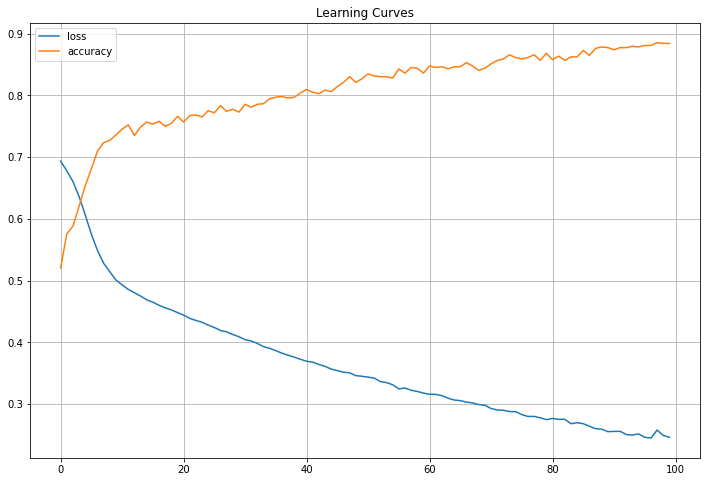

In [16]:

modelo = Sequential()

modelo.add(Input(shape=(100,), name = "Entrada"))
    
modelo.add( keras.layers.Dense(units = 20, kernel_initializer = 'he_normal', activation= 'elu' ))

modelo.add( keras.layers.Dense(units = 4 , kernel_initializer = 'he_normal', activation= 'elu' ))
 
modelo.add( keras.layers.Dense(units = 41, kernel_initializer = 'he_normal', activation= 'elu' ))    

modelo.add( keras.layers.Dense(units = 1 , kernel_initializer = 'he_normal' , name="Salida",activation= 'sigmoid')) 
    

modelo.compile(loss='binary_crossentropy',optimizer = 'Nadam',metrics=['accuracy'])

modelo.fit(X, y, epochs=100 ,batch_size=32)
df_history=pd.DataFrame(modelo.history.history)
print(df_history)

import matplotlib.pyplot as plt
df_history.plot(figsize=(12, 8),grid=True, title="Learning Curves");

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
#pred['Tweet'] = input('Escribe un tweet sobre Elon Musk: ')
pred = pd.DataFrame([input('Escribe...')])
pred.columns = [0]
pred[0] = pred[0].transform(limpiar_token)
pred[0] = pred[0].transform(tokenizador)
pred[0] = pred[0].transform(not_stopwords)
pred[0] = pred[0].transform(lemma_stemmer)
pred[0] = pred[0].apply(lambda _: str(_))


X2 = vectorizer.transform(pred[0])
vectorizer.get_feature_names_out()

X2=pd.DataFrame(X2.toarray())
X2.columns = vectorizer.get_feature_names_out()
X2 = pca_auto.transform(X2)
pripredicion = modelo.predict(X2)

print(pripredicion)
if pripredicion>0.50:
    print('🟢😁🟢')
elif pripredicion<0.50:
    print('🔴😡🔴')
else:
    print('error')

KeyboardInterrupt: Interrupted by user

In [18]:
#no son tan bueno los datos